In [1]:
import os
import sys
import time
import h5py
import pygrib
import numpy as np
from datetime import datetime, timedelta

sys.path.insert(0, '/glade/u/home/ksha/GAN_proj/')
sys.path.insert(0, '/glade/u/home/ksha/GAN_proj/libs/')

from namelist import *
import data_utils as du

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
with h5py.File(save_dir+'MRMS_ERA5_domain.hdf', 'r') as h5io:
    lon_ERA5 = h5io['lon_ERA5'][...]
    lat_ERA5 = h5io['lat_ERA5'][...]

In [5]:
year = 2021
base = datetime(year, 1, 1)
date_list = [base + timedelta(days=h) for h in range(365)]

In [14]:
shape_grid = lon_ERA5.shape

APCP = np.empty((len(date_list),)+shape_grid)
CAPE = np.empty((len(date_list),)+shape_grid)
PWAT = np.empty((len(date_list),)+shape_grid)
T800 = np.empty((len(date_list),)+shape_grid)
U800 = np.empty((len(date_list),)+shape_grid)
RH800 = np.empty((len(date_list),)+shape_grid)

In [ ]:
lead  = 3

for i_dt, dt in enumerate(date_list[:5]):

    filename_gfs = datetime.strftime(dt, 
        '/glade/campaign/collections/rda/data/ds084.1/%Y/%Y%m%d/gfs.0p25.%Y%m%d%H.f{:03d}.grib2'.format(lead))

    with pygrib.open(filename_gfs) as grbio:
        T_ = grbio[314+1].values #
        U_ = grbio[319+1].values
        RH_ = grbio[315+1].values
        APCP_ = grbio[450+1].values
        CAPE_ = grbio[473+1].values
        PWAT_ = grbio[475+1].values
    
    T_NA = T_[:-360, 720:]
    T_NA = np.flipud(np.concatenate((T_NA, T_[:-360, 0][:, None]), axis=1))
    
    U_NA = U_[:-360, 720:]
    U_NA = np.flipud(np.concatenate((U_NA, U_[:-360, 0][:, None]), axis=1))
    
    RH_NA = RH_[:-360, 720:]
    RH_NA = np.flipud(np.concatenate((RH_NA, RH_[:-360, 0][:, None]), axis=1))
    
    APCP_NA = APCP_[:-360, 720:]
    APCP_NA = np.flipud(np.concatenate((APCP_NA, APCP_[:-360, 0][:, None]), axis=1))
    
    CAPE_NA = CAPE_[:-360, 720:]
    CAPE_NA = np.flipud(np.concatenate((CAPE_NA, CAPE_[:-360, 0][:, None]), axis=1))
    
    PWAT_NA = PWAT_[:-360, 720:]
    PWAT_NA = np.flipud(np.concatenate((PWAT_NA, PWAT_[:-360, 0][:, None]), axis=1))


    APCP[i_dt, ...] = APCP_NA
    CAPE[i_dt, ...] = CAPE_NA
    PWAT[i_dt, ...] = PWAT_NA

    T800[i_dt, ...] = T_NA
    U800[i_dt, ...] = U_NA
    RH800[i_dt, ...] = RH_NA

    tuple_save = (APCP, CAPE, PWAT, T800, U800, RH800)
    label_save = ['APCP', 'CAPE', 'PWAT', 'T800', 'U800', 'RH800']

    du.save_hdf5(tuple_save, label_save, '/glade/campaign/cisl/aiml/ksha/GFS/', 'GFS_{}_f{:02d}.hdf'.format(year, lead))

In [12]:
APCP_NA.shape

(361, 721)

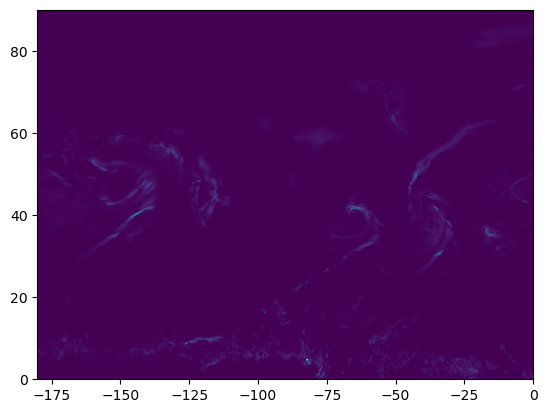

In [18]:
plt.pcolormesh(lon_ERA5, lat_ERA5, APCP[i_dt, ...])